## Entendimento do Problema

### Problema
Desenvolver um modelo preditivo que estima a probabilidade de um cliente não pagar o contrato (em tempo real).

### Objetivo
Reduzir os índices de inadimplência de um grande banco que oferece empréstimos para pessoa física.

### Variáveis:
- **Olhar dicionário de dados**

### Hipóteses:

1° - Quanto maior a quantidade de membros a família possui, maior a chance de inadimplência.  
2° - Quanto maior os dias de atraso, maior a chance de inadimplência.  
3° - Quanto menor a quantidade de parcelas, maior a chance de inadimplência.

## Entendimento dos dados

### Pacotes utilizados:

In [583]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [584]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Leitura das bases:

In [585]:
dicionario = pd.read_csv('dicionario_dados.csv', sep=";")
base_cadastral = pd.read_parquet('base_cadastral.parquet')
base_submissao = pd.read_parquet('base_submissao.parquet')
hist_emprestimos = pd.read_parquet('historico_emprestimos.parquet')
hist_parcelas = pd.read_parquet('historico_parcelas.parquet')


### base cadastral

In [586]:
hist_emprestimos.head()

,id_contrato,id_cliente,tipo_contrato,status_contrato,data_decisao,data_liberacao,data_primeiro_vencimento,data_ultimo_vencimento_original,data_ultimo_vencimento,data_encerramento,...,setor_vendedor,canal_venda,area_venda,dia_semana_solicitacao,hora_solicitacao,flag_ultima_solicitacao_contrato,flag_ultima_solicitacao_dia,motivo_recusa,acompanhantes_cliente,flag_seguro_contratado
0,2802425,108129,Cash loans,Approved,2024-08-29,None,2024-09-28,2027-08-14,None,None,...,XNA,Contact center,-1,THURSDAY,11,Y,1,XAP,Unaccompanied,1.00
1,2330894,258628,Cash loans,Approved,2022-10-11,None,2022-11-10,2024-09-30,2024-08-01,2024-08-04,...,XNA,Credit and cash offices,-1,TUESDAY,15,Y,1,XAP,Unaccompanied,1.00
2,1182516,267782,Cash loans,Approved,2023-04-08,None,2023-05-08,2025-09-24,None,None,...,XNA,Credit and cash offices,-1,SATURDAY,4,Y,1,XAP,None,1.00
3,1543131,275707,Cash loans,Approved,2024-02-08,None,2024-03-09,2025-02-02,2025-02-02,2025-02-09,...,XNA,Credit and cash offices,-1,THURSDAY,8,Y,1,XAP,Unaccompanied,1.00
4,2261993,299391,Revolving loans,Canceled,2024-09-06,None,None,None,None,None,...,XNA,Credit and cash offices,-1,FRIDAY,13,Y,1,XAP,None,NaN


In [587]:
%%capture
hist_emprestimos.info()

In [588]:
hist_emprestimos.describe(include='all').fillna('-')

,id_contrato,id_cliente,tipo_contrato,status_contrato,data_decisao,data_liberacao,data_primeiro_vencimento,data_ultimo_vencimento_original,data_ultimo_vencimento,data_encerramento,...,setor_vendedor,canal_venda,area_venda,dia_semana_solicitacao,hora_solicitacao,flag_ultima_solicitacao_contrato,flag_ultima_solicitacao_dia,motivo_recusa,acompanhantes_cliente,flag_seguro_contratado
count,186890.00,186890.00,186890,186890,186890,7100,107145,101143,87778,86087,...,186890,186890,186890.00,186890,186890.00,186890,186890.00,186890,94786,111691.00
unique,-,-,4,4,2940,2112,2906,4471,2828,2463,...,11,8,-,7,-,2,-,9,7,-
top,-,-,Cash loans,Approved,2024-06-26,2024-07-06,2024-03-22,2025-02-20,2024-04-18,2024-09-01,...,XNA,Credit and cash offices,-,TUESDAY,-,Y,-,XAP,Unaccompanied,-
freq,-,-,83546,116182,301,19,118,96,90,425,...,95776,80376,-,28459,-,185979,-,151948,56618,-
mean,1925411.15,278440.00,-,-,-,-,-,-,-,-,...,-,-,304.10,-,12.47,-,1.00,-,-,0.33
std,532202.08,102686.99,-,-,-,-,-,-,-,-,...,-,-,1600.38,-,3.33,-,0.06,-,-,0.47
min,1000003.00,100023.00,-,-,-,-,-,-,-,-,...,-,-,-1.00,-,0.00,-,0.00,-,-,0.00
25%,1465414.25,189807.00,-,-,-,-,-,-,-,-,...,-,-,-1.00,-,10.00,-,1.00,-,-,0.00
50%,1925815.00,278614.50,-,-,-,-,-,-,-,-,...,-,-,3.00,-,12.00,-,1.00,-,-,0.00
75%,2385854.00,367186.00,-,-,-,-,-,-,-,-,...,-,-,84.00,-,15.00,-,1.00,-,-,1.00


In [589]:
round((base_cadastral.isnull().sum()/len(base_cadastral)) * 100, 2).map(lambda x: f"{x}%")

id_cliente                      0.0%
sexo                            0.0%
data_nascimento                 0.0%
qtd_filhos                      0.0%
qtd_membros_familia             0.0%
renda_anual                     0.0%
tipo_renda                      0.0%
ocupacao                      31.69%
tipo_organizacao                0.0%
nivel_educacao                  0.0%
estado_civil                    0.0%
tipo_moradia                    0.0%
possui_carro                    0.0%
possui_imovel                   0.0%
nota_regiao_cliente             0.0%
nota_regiao_cliente_cidade      0.0%
dtype: object

### historico emprestimos

In [590]:
%%capture
hist_emprestimos.head()

In [591]:
hist_emprestimos.describe(include='all').fillna('-')

,id_contrato,id_cliente,tipo_contrato,status_contrato,data_decisao,data_liberacao,data_primeiro_vencimento,data_ultimo_vencimento_original,data_ultimo_vencimento,data_encerramento,...,setor_vendedor,canal_venda,area_venda,dia_semana_solicitacao,hora_solicitacao,flag_ultima_solicitacao_contrato,flag_ultima_solicitacao_dia,motivo_recusa,acompanhantes_cliente,flag_seguro_contratado
count,186890.00,186890.00,186890,186890,186890,7100,107145,101143,87778,86087,...,186890,186890,186890.00,186890,186890.00,186890,186890.00,186890,94786,111691.00
unique,-,-,4,4,2940,2112,2906,4471,2828,2463,...,11,8,-,7,-,2,-,9,7,-
top,-,-,Cash loans,Approved,2024-06-26,2024-07-06,2024-03-22,2025-02-20,2024-04-18,2024-09-01,...,XNA,Credit and cash offices,-,TUESDAY,-,Y,-,XAP,Unaccompanied,-
freq,-,-,83546,116182,301,19,118,96,90,425,...,95776,80376,-,28459,-,185979,-,151948,56618,-
mean,1925411.15,278440.00,-,-,-,-,-,-,-,-,...,-,-,304.10,-,12.47,-,1.00,-,-,0.33
std,532202.08,102686.99,-,-,-,-,-,-,-,-,...,-,-,1600.38,-,3.33,-,0.06,-,-,0.47
min,1000003.00,100023.00,-,-,-,-,-,-,-,-,...,-,-,-1.00,-,0.00,-,0.00,-,-,0.00
25%,1465414.25,189807.00,-,-,-,-,-,-,-,-,...,-,-,-1.00,-,10.00,-,1.00,-,-,0.00
50%,1925815.00,278614.50,-,-,-,-,-,-,-,-,...,-,-,3.00,-,12.00,-,1.00,-,-,0.00
75%,2385854.00,367186.00,-,-,-,-,-,-,-,-,...,-,-,84.00,-,15.00,-,1.00,-,-,1.00


In [592]:
round((hist_emprestimos.isnull().sum()/len(hist_emprestimos)) * 100, 2).map(lambda x: f"{x}%")

id_contrato                           0.0%
id_cliente                            0.0%
tipo_contrato                         0.0%
status_contrato                       0.0%
data_decisao                          0.0%
data_liberacao                       96.2%
data_primeiro_vencimento            42.67%
data_ultimo_vencimento_original     45.88%
data_ultimo_vencimento              53.03%
data_encerramento                   53.94%
valor_solicitado                      0.0%
valor_credito                         0.0%
valor_bem                           23.24%
valor_parcela                       22.35%
valor_entrada                        53.6%
percentual_entrada                   53.6%
qtd_parcelas_planejadas             22.35%
taxa_juros_padrao                   99.66%
taxa_juros_promocional              99.66%
tipo_pagamento                        0.0%
finalidade_emprestimo                 0.0%
tipo_cliente                          0.0%
faixa_rendimento                      0.0%
tipo_portfo

*Valores nulos:* <ab>

Data liberação: Sugere muitas propostas que foram aprovadas ou recusadas, mas não foram convertidas. <ab>

Datas de vencimento: Só existem essas datas para contratos que foram formalizados. Porém como há menos nulos que "data_liberacao", pode ser que o sistema gere um cronograma previsto antes de finalizar o contrato. <ab>

Data encerramento: Representam a carteira ativa, ou seja, cliente que estão pagando suas parcelas, assim não possuindo data de encerramento registrada. <ab>

Entradas: Contratos realizados com 100% de financiamento. <ab>

Taxa de juros: Sugere que são dados sensíveis.

### histórico parcelas

In [593]:
hist_parcelas.head()

,id_contrato,id_cliente,versao_parcela,numero_parcela,data_prevista_pagamento,data_real_pagamento,valor_previsto_parcela,valor_pago_parcela
0,1594684,100193,0.00,56,2021-12-21,2021-12-21,301.86,301.86
1,1995642,134723,1.00,38,2021-08-09,2021-08-04,12949.20,12949.20
2,1720935,176364,1.00,9,2024-03-06,2024-03-04,61192.53,61192.53
3,1439208,154898,1.00,20,2024-08-11,2024-08-07,8851.23,8851.23
4,1640082,172575,1.00,4,2022-11-15,2022-11-10,8720.28,8720.28


In [594]:
%%capture
hist_parcelas.info()

In [595]:
hist_parcelas.describe(include='all').fillna('-')

,id_contrato,id_cliente,versao_parcela,numero_parcela,data_prevista_pagamento,data_real_pagamento,valor_previsto_parcela,valor_pago_parcela
count,1390978.00,1390978.00,1390978.00,1390978.00,1390978,1390639,1390978.00,1390639.00
unique,-,-,-,-,2910,2923,-,-
top,-,-,-,-,2024-07-22,2024-10-21,-,-
freq,-,-,-,-,1250,1593,-,-
mean,1908259.12,278845.69,0.93,14.92,-,-,18145.87,18353.37
std,535193.18,102181.63,1.06,20.90,-,-,52183.44,56500.72
min,1000003.00,100023.00,0.00,1.00,-,-,0.00,0.00
25%,1437671.00,191166.00,1.00,4.00,-,-,4677.16,4106.93
50%,1902062.00,279270.00,1.00,8.00,-,-,9300.58,8980.25
75%,2371329.00,367159.00,1.00,15.00,-,-,17902.58,17246.92


In [596]:
round((hist_parcelas.isnull().sum()/len(hist_parcelas)) * 100, 2).map(lambda x: f"{x}%")

id_contrato                 0.0%
id_cliente                  0.0%
versao_parcela              0.0%
numero_parcela              0.0%
data_prevista_pagamento     0.0%
data_real_pagamento        0.02%
valor_previsto_parcela      0.0%
valor_pago_parcela         0.02%
dtype: object

### base submissão

In [597]:
base_submissao.head()

,id_cliente,data_solicitacao,dia_semana_solicitacao,hora_solicitacao,tipo_contrato,valor_credito,valor_bem,valor_parcela
0,100023,2025-02-24,MONDAY,12,Cash loans,544491.00,454500.00,17563.50
1,100031,2025-02-17,MONDAY,9,Cash loans,979992.00,702000.00,27076.50
2,100056,2025-02-20,THURSDAY,10,Cash loans,1506816.00,1350000.00,49927.50
3,100069,2025-02-10,MONDAY,11,Cash loans,640458.00,517500.00,27265.50
4,100085,2025-02-19,WEDNESDAY,12,Cash loans,755190.00,675000.00,28894.50


In [598]:
%%capture
base_submissao.info()

In [599]:
base_submissao.describe(include='all').fillna('-')

,id_cliente,data_solicitacao,dia_semana_solicitacao,hora_solicitacao,tipo_contrato,valor_credito,valor_bem,valor_parcela
count,40000.00,40000,40000,40000.00,40000,40000.00,39976.00,39996.00
unique,-,21,7,-,2,-,-,-
top,-,2025-02-11,TUESDAY,-,Cash loans,-,-,-
freq,-,2448,7231,-,36599,-,-,-
mean,278414.66,-,-,12.03,-,586259.67,526968.20,27376.03
std,102575.20,-,-,3.27,-,395313.88,363020.87,14750.17
min,100023.00,-,-,0.00,-,45000.00,40500.00,2295.00
25%,190486.25,-,-,10.00,-,270000.00,238500.00,16681.50
50%,277796.50,-,-,12.00,-,502497.00,450000.00,25060.50
75%,367312.25,-,-,14.00,-,791861.62,675000.00,34781.62


In [600]:
round((base_submissao.isnull().sum()/len(base_submissao)) * 100, 2).map(lambda x: f"{x}%")

id_cliente                 0.0%
data_solicitacao           0.0%
dia_semana_solicitacao     0.0%
hora_solicitacao           0.0%
tipo_contrato              0.0%
valor_credito              0.0%
valor_bem                 0.06%
valor_parcela             0.01%
dtype: object

## Preparação dos dados

### base cadastral

In [601]:
# Criando variável: Idade
base_cadastral['idade'] = (pd.to_datetime('today') - pd.to_datetime(base_cadastral['data_nascimento'])).dt.days // 365
base_cadastral.drop("data_nascimento", axis = 1, inplace=True)

In [602]:
# Tratando N/A
base_cadastral['ocupacao'] = base_cadastral['ocupacao'].fillna('N/A')

In [603]:
# Calculos
base_cadastral['proporcao_filhos_familia'] = (base_cadastral['qtd_filhos'] / base_cadastral['qtd_membros_familia']).replace([np.inf, np.nan], 0)
base_cadastral['log_renda_anual'] = np.log1p(base_cadastral['renda_anual'])

In [604]:
# Flags
base_cadastral['possui_carro'] = (base_cadastral['possui_carro'] == 'Y').astype(int)
base_cadastral['possui_imovel'] = (base_cadastral['possui_imovel'] == 'Y').astype(int)
base_cadastral['tem_filhos'] = (base_cadastral['qtd_filhos'] > 0).astype(int)

In [605]:
# Agrupamento de categorias com baixa ocorrência
cat_cols =  ['ocupacao','tipo_renda']

for col in cat_cols:
    freq = base_cadastral[col].value_counts(normalize=True)
    rare = freq[freq < 0.01].index
    base_cadastral[col] = base_cadastral[col].replace(rare, 'Outros')

In [606]:
# Ajustando categorias com baixa ocorrência para classe já existente
freq_organizacao = base_cadastral['tipo_organizacao'].value_counts(normalize=True)
rare_organizaca = freq_organizacao[freq_organizacao < 0.01].index

base_cadastral['tipo_organizacao'] = base_cadastral['tipo_organizacao'].replace(rare_organizaca, 'Other')

In [607]:
# Diminuindo dimensionalidade das categorias
base_cadastral['tipo_moradia'] = base_cadastral['tipo_moradia'].replace({'Office apartment': 'Outros', 'Co-op apartment': 'Outros'})

### histórico emprestimos

In [608]:
# Tratando as variáveis de data
date_cols = ['data_liberacao', 'data_primeiro_vencimento',
    'data_ultimo_vencimento_original', 'data_ultimo_vencimento',
    'data_encerramento']

for col in date_cols:
    hist_emprestimos[col] = pd.to_datetime(hist_emprestimos[col], errors='coerce')

In [609]:
# criando flags de missing 
num_cols = ['valor_bem','valor_parcela','valor_entrada',
    'percentual_entrada','qtd_parcelas_planejadas',
    'taxa_juros_padrao','taxa_juros_promocional']

for col in num_cols:
    hist_emprestimos[f'{col}_missing'] = hist_emprestimos[col].isna().astype(int)

# Inputando 0 nas variáveis númericas
hist_emprestimos[num_cols] = hist_emprestimos[num_cols].fillna(0)

In [610]:
# Tratando N/A
hist_emprestimos['combinacao_produto'] = (hist_emprestimos['combinacao_produto'].fillna('N/A'))
hist_emprestimos['acompanhantes_cliente'] = (hist_emprestimos['acompanhantes_cliente'].fillna('N/A'))

In [611]:
# Flags
hist_emprestimos['flag_cronograma_definido'] = (hist_emprestimos['data_primeiro_vencimento'].notna().astype(int))

hist_emprestimos['flag_liberado'] = hist_emprestimos['data_liberacao'].notna().astype(int)

hist_emprestimos['flag_seguro_info_disponivel'] = (hist_emprestimos['flag_seguro_contratado'].notna().astype(int))

hist_emprestimos['flag_seguro_contratado'] = (hist_emprestimos['flag_seguro_contratado'].fillna(0).astype(int))


In [612]:
# Cálculos
hist_emprestimos['duracao_contrato_dias'] = (hist_emprestimos['data_ultimo_vencimento'] - hist_emprestimos['data_primeiro_vencimento']).dt.days
hist_emprestimos['duracao_contrato_dias'] = (hist_emprestimos['duracao_contrato_dias'].fillna(0))

hist_emprestimos['tempo_decisao_liberacao'] = (hist_emprestimos['data_liberacao'] - pd.to_datetime(hist_emprestimos['data_decisao'])).dt.days
hist_emprestimos['tempo_decisao_liberacao'] = (hist_emprestimos['tempo_decisao_liberacao'].fillna(0))

hist_emprestimos['pct_valor_entrada'] = (hist_emprestimos['valor_entrada'] / hist_emprestimos['valor_credito']).replace([np.inf, np.nan], 0)

hist_emprestimos['parcela_credito_ratio'] = (hist_emprestimos['valor_parcela'] / hist_emprestimos['valor_credito']).replace([np.inf, np.nan], 0)

hist_emprestimos['log_valor_credito'] = np.log1p(hist_emprestimos['valor_credito'])

In [613]:
# Feature data
hist_emprestimos['hora_solicitacao_bin'] = pd.cut(
    hist_emprestimos['hora_solicitacao'],
    bins=[0,6,12,18,24],
    labels=['madrugada','manha','tarde','noite'],
    right=False
)

In [614]:
# Agrupamento de categorias com baixa ocorrência
cat_cols = ['categoria_bem','finalidade_emprestimo','canal_venda','area_venda', 'setor_vendedor']

for col in cat_cols:
    freq = hist_emprestimos[col].value_counts(normalize=True)
    rare = freq[freq < 0.01].index
    hist_emprestimos[col] = hist_emprestimos[col].replace(rare, 'Outros')


In [615]:
# Diminuindo dimensionalidade das categorias
hist_emprestimos['acompanhantes_cliente'] = (hist_emprestimos['acompanhantes_cliente'].replace({'Other_A': 'Outros', 'Other_B': 'Outros', 'Group of people' : 'Outros'}))

def agrupa_combinacao(x):
    if 'Cash' in x:
        return 'Cash'
    elif 'POS' in x:
        return 'POS'
    elif 'Card' in x:
        return 'Card'
    else:
        return "Outros"
    
hist_emprestimos['combinacao_produto'] = hist_emprestimos['combinacao_produto'].fillna("N/A").apply(agrupa_combinacao)

Variáveis como 'status_contrato', 'motivo_recusa' e 'data_encerramento' foram excluídas da modelagem por refletirem informações disponíveis apenas após a decisão de crédito, caracterizando vazamento de informação (data leakage). A variável 'data_ultimo_vencimento' foi utilizada de forma agregada para cálculo de duração de contrato, dessa forma não gerando data leaked.


### histórico parcelas

In [616]:
# Converte datas
date_cols = ['data_prevista_pagamento','data_real_pagamento']

for col in date_cols:
    hist_parcelas[col] = pd.to_datetime(hist_parcelas[col])


# Ajuste da data de pagamento para casos não pagos
data_corte = hist_parcelas['data_prevista_pagamento'].max()
hist_parcelas['data_pagamento_ajustada'] = hist_parcelas['data_real_pagamento'].fillna(data_corte)

# Calcular atraso em dias (pagamento antecipado = 0)
hist_parcelas['atraso_dias'] = (hist_parcelas['data_pagamento_ajustada'] - hist_parcelas['data_prevista_pagamento']).dt.days.clip(lower=0)

In [ ]:
# Flags
hist_parcelas['flag_atraso'] = (hist_parcelas['atraso_dias'] > 0).astype(int)

hist_parcelas['atraso_30'] = (hist_parcelas['atraso_dias'] >= 30).astype(int)

hist_parcelas['atraso_60'] = (hist_parcelas['atraso_dias'] >= 60).astype(int)

hist_parcelas['pagamento_parcial'] = (hist_parcelas['valor_pago_parcela'] < hist_parcelas['valor_previsto_parcela']).astype(int)

In [618]:
# Percentual pago
hist_parcelas['pct_pago'] = (hist_parcelas['valor_pago_parcela'] / hist_parcelas['valor_previsto_parcela']).fillna(0)

In [619]:
# Restringindo base à minha variável target (6 primeiros meses - MOB06)
hist_parcelas_6m = hist_parcelas[hist_parcelas['numero_parcela'] <= 6].copy()

In [620]:
# Agregação por contrato
agg_parcelas = hist_parcelas_6m.groupby('id_contrato') \
    .agg(
        qtd_parcelas_6m = ('numero_parcela', 'count'),
        atraso_medio = ('atraso_dias', 'mean'),
        atraso_max = ('atraso_dias', 'max'),
        qtd_parcelas_atraso = ('flag_atraso', 'sum'),
        qtd_atraso_30 = ('atraso_30', 'sum'),
        qtd_atraso_60 = ('atraso_60', 'sum'),
        pct_pago_medio = ('pct_pago', 'mean'),
        qtd_pagamento_parcial = ('pagamento_parcial', 'sum')
).reset_index()

As informações do histórico de parcelas foram utilizadas exclusivamente de forma agregada por contrato e restritas até o sexto mês do contrato, sendo assim compatível com a definição da variável target, garantindo que apenas informações disponíveis antes do evento fossem utilizadas.

### Variável target

#### Avaliação de definições de inadimplência

In [621]:
# Primeiras 3 parcelas
parcelas_mob03 = hist_parcelas[
    hist_parcelas['numero_parcela'] <= 3
].copy()

# Flag atraso
parcelas_mob03['flag_atraso_30'] = (
    parcelas_mob03['atraso_dias'] > 30
).astype(int)

# Agregando por contrato
target_ever30 = (
    parcelas_mob03
    .groupby('id_contrato', as_index=False)
    .agg(ever30mob03=('flag_atraso_30', 'max'))
                )

print(f"Distribuição: \n{target_ever30['ever30mob03'].value_counts(normalize=True).map(lambda x: f"{x:.4%}")}")

Distribuição: 
ever30mob03
0    99.7598%
1     0.2402%
Name: proportion, dtype: object


#### A definição EVER30MOB03 foi testada, porém descartada devido à baixa incidência de eventos. 

#### Definição da variável target final

In [622]:
# Soma atraso acumulado por contrato
target_over60 = (
    hist_parcelas_6m
    .groupby('id_contrato', as_index=False)
    .agg(atraso_total_mob06=('atraso_dias', 'sum'))
)

# Flag de inadimplência
target_over60['over60mob06'] = (target_over60['atraso_total_mob06'] > 60).astype(int)

# Distribuição
print(f"Distribuição target: \n{target_over60['over60mob06'].value_counts(normalize=True).map(lambda x: f"{x:.4%}")}")


Distribuição target: 
over60mob06
0    98.8736%
1     1.1264%
Name: proportion, dtype: object


#### A variável target adotada foi a OVER60MOB06, que identifica contratos com mais de 60 dias acumulados de atraso nos seis primeiros meses. A incidência observada foi de 1,13%, indicando um cenário de eventos raros. Diante disso, o problema foi tratado como classificação de eventos raros, priorizando a capacidade do modelo de ranquear corretamente contratos de maior risco.

### Dataset final

In [623]:
df_model = hist_emprestimos.merge(
    base_cadastral,
    on='id_cliente',
    how='left',
    validate='m:1'
)
df_model.shape

(186890, 71)

In [624]:
df_model = df_model.merge(
    agg_parcelas,
    on='id_contrato',
    how='left',
    validate='1:1'
)
df_model.shape

(186890, 79)

In [625]:
# Checagens básicas
print("Linhas:", df_model.shape[0])
print("Colunas:", df_model.shape[1])

# Unicidade por contrato
print(f"Contratos únicos: {df_model['id_contrato'].is_unique}")

df_model.isna().mean().sort_values(ascending=False).head(10)

Linhas: 186890
Colunas: 79
Contratos únicos: True


data_liberacao                    0.96
data_encerramento                 0.54
data_ultimo_vencimento            0.53
data_ultimo_vencimento_original   0.46
data_primeiro_vencimento          0.43
qtd_pagamento_parcial             0.43
atraso_medio                      0.43
atraso_max                        0.43
qtd_parcelas_atraso               0.43
qtd_parcelas_6m                   0.43
dtype: float64

In [626]:
parcelas_cols = [
    'qtd_parcelas_6m',
    'atraso_medio',
    'atraso_max',
    'qtd_parcelas_atraso',
    'qtd_atraso_30',
    'qtd_atraso_60',
    'pct_pago_medio',
    'qtd_pagamento_parcial'
]

# Criando flags dos missing
for col in parcelas_cols:
    df_model[f'{col}_missing'] = df_model[col].isna().astype(int)

# Valores NA inputados 0
df_model[parcelas_cols] = df_model[parcelas_cols].fillna(0)

Para contratos sem histórico de parcelas no período analisado, foram criadas flags indicativas e os valores numéricos foram imputados com zero.

In [627]:
# Variavel target criada anteriormente
df_model = df_model.merge(
    target_over60[['id_contrato', 'over60mob06']],
    on='id_contrato',
    how='left',
    validate='1:1'
)
df_model.shape

(186890, 88)

In [628]:
# Filtrar população elegível
df_model = df_model[df_model['over60mob06'].notna()].copy()

In [629]:
cols_leakage = [
    'status_contrato',
    'motivo_recusa',
    'data_encerramento',
    'data_ultimo_vencimento',
    'data_ultimo_vencimento_original'
]

df_model = df_model.drop(
    columns=[c for c in cols_leakage if c in df_model.columns]
)

#### Foram mantidos apenas contratos com histórico completo de pelo menos seis meses após a concessão, permitindo a correta identificação de eventos de inadimplência.
#### Com as bases tratadas, agregadas e alinhadas à nível de contrato, o conjunto de dados está pronto para análise exploratória com a variável target e posterior modelagem.

## Análise Explorátoria

In [632]:
df_model['over60mob06'].value_counts(normalize=True)

over60mob06
0.00   0.99
1.00   0.01
Name: proportion, dtype: float64

Observa-se forte desbalanceamento da variável alvo, caracterizando um problema de evento raro.

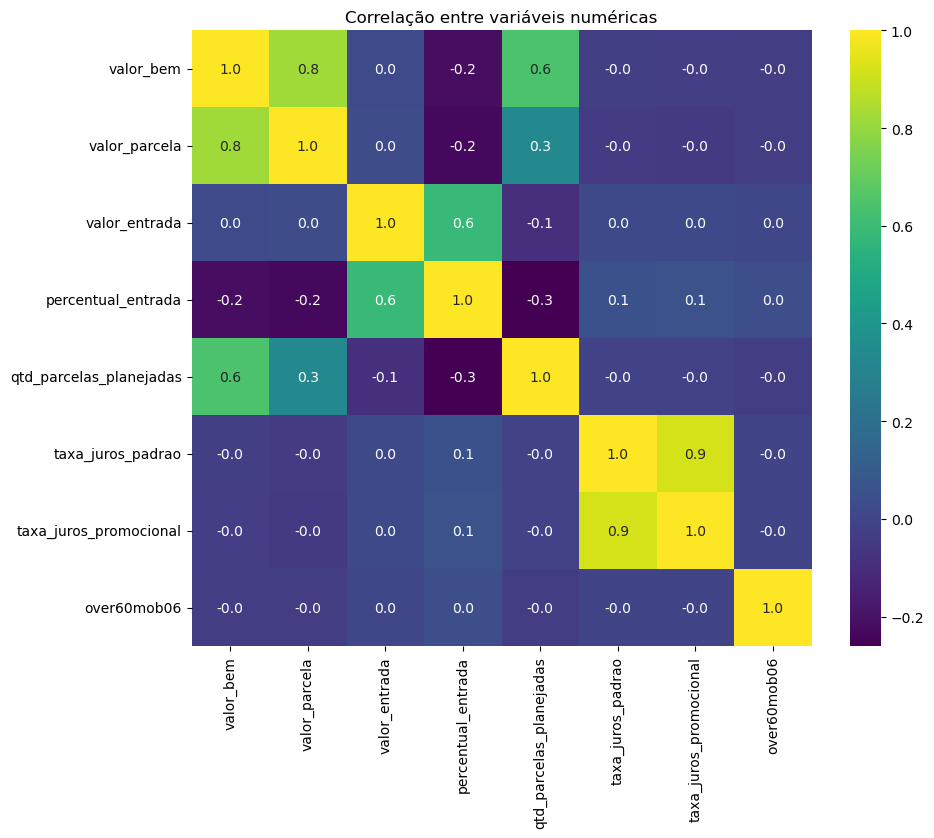

In [640]:
corr = df_model[num_cols + ['over60mob06']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='viridis', annot=True, fmt='.1f')
plt.title('Correlação entre variáveis numéricas')
plt.show()

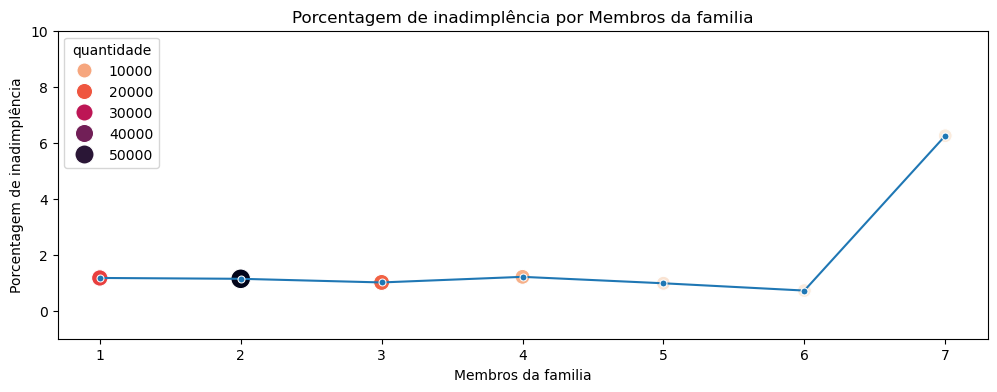

In [768]:
familia_inad = (
    df_model.groupby(['over60mob06', 'qtd_membros_familia'], observed=False) \
    .agg(count = pd.NamedAgg(column='qtd_membros_familia', aggfunc='count')) \
    .reset_index() \
    .pivot(index = 'qtd_membros_familia', columns='over60mob06', values= 'count')    
)
familia_inad.reset_index(inplace=True)

# Criando a coluna de quantidade total de ofertas
familia_inad['quantidade'] = familia_inad[0] + familia_inad[1]

familia_inad['Inadimplência_%'] = round((familia_inad[1] / (familia_inad[0] + familia_inad[1]) * 100),2)


# Gráfico
plt.figure(figsize=(12,4))

g = sns.lineplot(data = familia_inad, x= 'qtd_membros_familia', y = 'Inadimplência_%', marker ='o', markersize = 5)

g1 = sns.scatterplot(
    data=familia_inad,
    x='qtd_membros_familia',
    y='Inadimplência_%',
    size='quantidade', 
    sizes=(100, 200),  
    alpha=1,  
    legend=True,  
    hue = 'quantidade',
    palette='rocket_r'
)

# Textos
plt.title('Porcentagem de inadimplência por Membros da familia')
plt.xlabel('Membros da familia')
plt.ylabel('Porcentagem de inadimplência')
plt.ylim(-1,10)
None

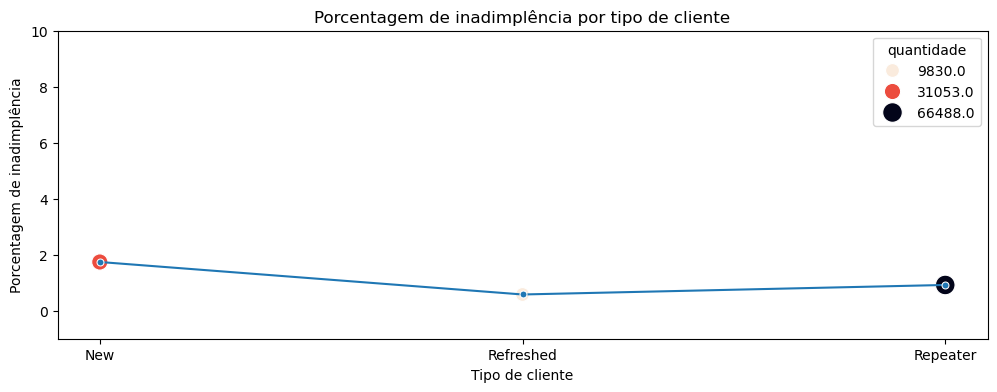

In [783]:
tipo_cliente_inad = (
    df_model.groupby(['over60mob06', 'tipo_cliente'], observed=False) \
    .agg(count = pd.NamedAgg(column='tipo_cliente', aggfunc='count')) \
    .reset_index() \
    .pivot(index = 'tipo_cliente', columns='over60mob06', values= 'count')    
)
tipo_cliente_inad.reset_index(inplace=True)

# Criando a coluna de quantidade total de ofertas
tipo_cliente_inad['quantidade'] = tipo_cliente_inad[0] + tipo_cliente_inad[1]

tipo_cliente_inad['Inadimplência_%'] = round((tipo_cliente_inad[1] / (tipo_cliente_inad[0] + tipo_cliente_inad[1]) * 100),2)


# Gráfico
plt.figure(figsize=(12,4))

g = sns.lineplot(data = tipo_cliente_inad, x= 'tipo_cliente', y = 'Inadimplência_%', marker ='o', markersize = 5)

g1 = sns.scatterplot(
    data=tipo_cliente_inad,
    x='tipo_cliente',
    y='Inadimplência_%',
    size='quantidade', 
    sizes=(100, 200),  
    alpha=1,  
    legend=True,  
    hue = 'quantidade',
    palette='rocket_r'
)

# Textos
plt.title('Porcentagem de inadimplência por tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Porcentagem de inadimplência')
plt.ylim(-1,10)
None

In [792]:
%%capture
# Nova coluna com os bins (gerações)
bins = [df_model['idade'].min(), 30, 45, 59, df_model['idade'].max()]
labels = [f'{df_model['idade'].min()}-30', '30-45', '45-59', f'59-{df_model['idade'].max()}']

df_model['idade_bins'] = pd.cut(df_model['idade'], bins=bins, labels=labels, right=True, include_lowest=True)

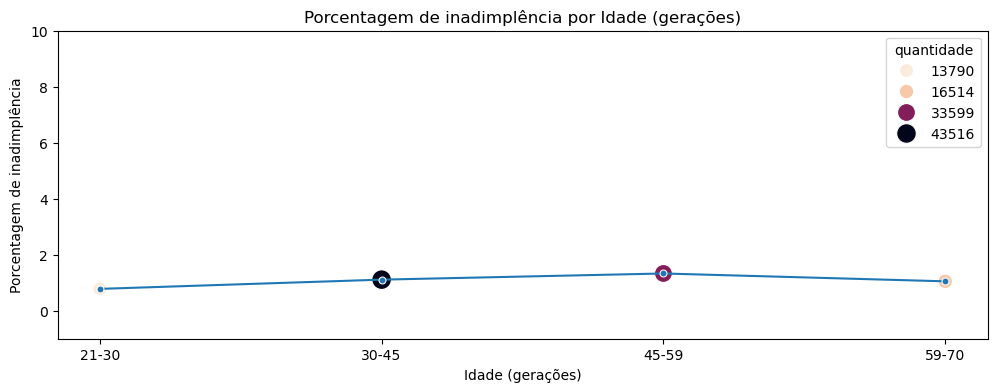

In [794]:
idade_inad = (
    df_model.groupby(['over60mob06', 'idade_bins'], observed=False) \
    .agg(count = pd.NamedAgg(column='idade_bins', aggfunc='count')) \
    .reset_index() \
    .pivot(index = 'idade_bins', columns='over60mob06', values= 'count')    
)
idade_inad.reset_index(inplace=True)

# Criando a coluna de quantidade total de ofertas
idade_inad['quantidade'] = idade_inad[0] + idade_inad[1]

idade_inad['Inadimplência_%'] = round((idade_inad[1] / (idade_inad[0] + idade_inad[1]) * 100),2)


# Gráfico
plt.figure(figsize=(12,4))

g = sns.lineplot(data = idade_inad, x= 'idade_bins', y = 'Inadimplência_%', marker ='o', markersize = 5)

g1 = sns.scatterplot(
    data=idade_inad,
    x='idade_bins',
    y='Inadimplência_%',
    size='quantidade', 
    sizes=(100, 200),  
    alpha=1,  
    legend=True,  
    hue = 'quantidade',
    palette='rocket_r'
)

# Textos
plt.title('Porcentagem de inadimplência por Idade (gerações)')
plt.xlabel('Idade (gerações)')
plt.ylabel('Porcentagem de inadimplência')
plt.ylim(-1,10)
None

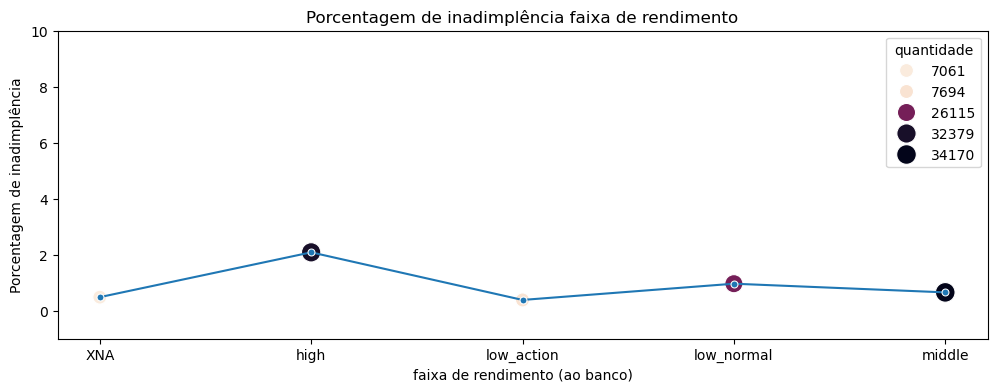

In [795]:
rendimento_inad = (
    df_model.groupby(['over60mob06', 'faixa_rendimento'], observed=False) \
    .agg(count = pd.NamedAgg(column='faixa_rendimento', aggfunc='count')) \
    .reset_index() \
    .pivot(index = 'faixa_rendimento', columns='over60mob06', values= 'count')    
)
rendimento_inad.reset_index(inplace=True)

# Criando a coluna de quantidade total de ofertas
rendimento_inad['quantidade'] = rendimento_inad[0] + rendimento_inad[1]

rendimento_inad['Inadimplência_%'] = round((rendimento_inad[1] / (rendimento_inad[0] + rendimento_inad[1]) * 100),2)


# Gráfico
plt.figure(figsize=(12,4))

g = sns.lineplot(data =rendimento_inad, x= 'faixa_rendimento', y = 'Inadimplência_%', marker ='o', markersize = 5)

g1 = sns.scatterplot(
    data=rendimento_inad,
    x='faixa_rendimento',
    y='Inadimplência_%',
    size='quantidade', 
    sizes=(100, 200),  
    alpha=1,  
    legend=True,  
    hue = 'quantidade',
    palette='rocket_r'
)

# Textos
plt.title('Porcentagem de inadimplência faixa de rendimento')
plt.xlabel('faixa de rendimento (ao banco)')
plt.ylabel('Porcentagem de inadimplência')
plt.ylim(-1,10)
None

In [ ]:
# Nova coluna com os bins (dias de atraso)
bins = [df_model['atraso_max'].min(), 1, 2, 3, 4, df_model['atraso_max'].max()]
labels = [f'{df_model['atraso_max'].min()}-1', '1-2', '2-3', '3-4', f'4-{df_model['atraso_max'].max()}']

df_model['atraso_max_bins'] = pd.cut(df_model['atraso_max'], bins=bins, labels=labels, right=True, include_lowest=True)

Quantil:
Q1: 1.0 
Q2: 2.0 
Q3: 3.0 
Q4: 4.0 



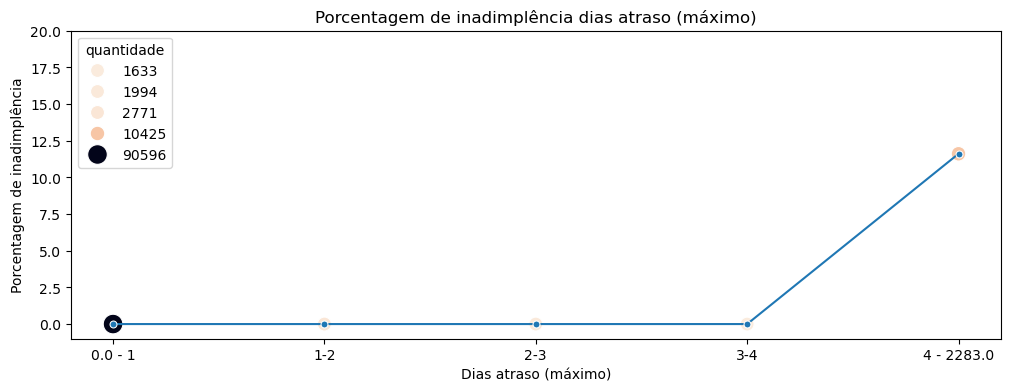

In [749]:
atraso_max_inad = (
    df_model.groupby(['over60mob06', 'atraso_max_bins'], observed=False) \
    .agg(count = pd.NamedAgg(column='atraso_max_bins', aggfunc='count')) \
    .reset_index() \
    .pivot(index = 'atraso_max_bins', columns='over60mob06', values= 'count')    
)
atraso_max_inad.reset_index(inplace=True)

# Criando a coluna de quantidade total de ofertas
atraso_max_inad['quantidade'] = atraso_max_inad[0] + atraso_max_inad[1]

atraso_max_inad['Inadimplência_%'] = round((atraso_max_inad[1] / (atraso_max_inad[0] + atraso_max_inad[1]) * 100),2)


# Gráfico
plt.figure(figsize=(12,4))

g = sns.lineplot(data =atraso_max_inad, x= 'atraso_max_bins', y = 'Inadimplência_%', marker ='o', markersize = 5)

g1 = sns.scatterplot(
    data=atraso_max_inad,
    x='atraso_max_bins',
    y='Inadimplência_%',
    size='quantidade', 
    sizes=(100, 200),  
    alpha=1,  
    legend=True,  
    hue = 'quantidade',
    palette='rocket_r'
)

# Textos
plt.title('Porcentagem de inadimplência dias atraso (máximo)')
plt.xlabel('Dias atraso (máximo)')
plt.ylabel('Porcentagem de inadimplência')
plt.ylim(-1,20)
None

In [ ]:
# Nova coluna com os bins (quartis da parcela)
bins = [df_model['pct_pago_medio'].min(), 0.25, 0.5, 0.75, 1, df_model['pct_pago_medio'].max()]
labels = [f'{df_model['pct_pago_medio'].min()}-0.25', '0.25-0.50', '0.50-0.75', '0.75-1', f'1-{df_model['pct_pago_medio'].max()}']

df_model['pct_pago_medio_bins'] = pd.cut(df_model['pct_pago_medio'], bins=bins, labels=labels, right=True, include_lowest=True)

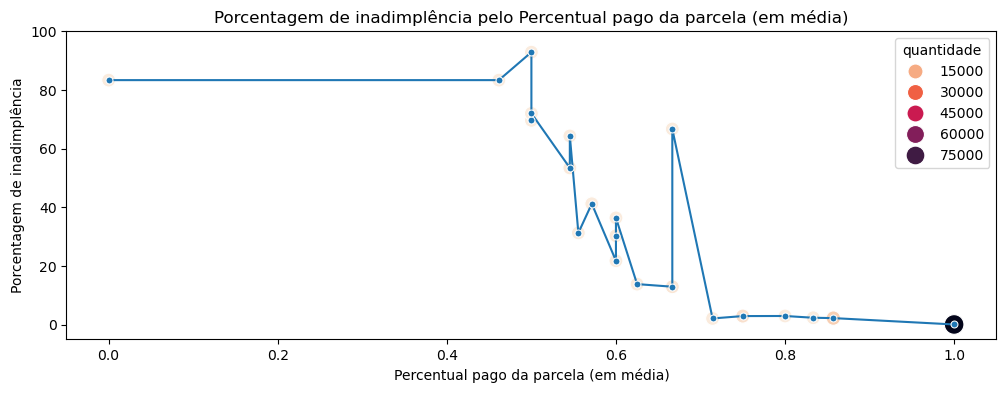

In [796]:
pct_pago_inad = (
    df_model.groupby(['over60mob06', 'pct_pago_medio'], observed=False) \
    .agg(count = pd.NamedAgg(column='pct_pago_medio', aggfunc='count')) \
    .reset_index() \
    .pivot(index = 'pct_pago_medio', columns='over60mob06', values= 'count')    
)
pct_pago_inad.reset_index(inplace=True)

# Criando a coluna de quantidade total de ofertas
pct_pago_inad['quantidade'] = pct_pago_inad[0] + pct_pago_inad[1]

pct_pago_inad['Inadimplência_%'] = round((pct_pago_inad[1] / (pct_pago_inad[0] + pct_pago_inad[1]) * 100),2)


# Gráfico
plt.figure(figsize=(12,4))

g = sns.lineplot(data =pct_pago_inad, x= 'pct_pago_medio', y = 'Inadimplência_%', marker ='o', markersize = 5)

g1 = sns.scatterplot(
    data=pct_pago_inad,
    x='pct_pago_medio',
    y='Inadimplência_%',
    size='quantidade', 
    sizes=(100, 200),  
    alpha=1,  
    legend=True,  
    hue = 'quantidade',
    palette='rocket_r'
)

# Textos
plt.title('Porcentagem de inadimplência pelo Percentual pago da parcela (em média)')
plt.xlabel('Percentual pago da parcela (em média)')
plt.ylabel('Porcentagem de inadimplência')
plt.ylim(-5,100)
None

In [745]:
# Nova coluna com os bins (anos)
bins = [df_model['qtd_parcelas_planejadas'].min(), 12, 24, 36, 48, 60, 72, df_model['qtd_parcelas_planejadas'].max()]
labels = [f'{df_model['qtd_parcelas_planejadas'].min()}-12', '12-24', '24-36', '36-48', '48-60', '60-72', f'72-{df_model['qtd_parcelas_planejadas'].max()}']

df_model['qtd_parcelas_planejadas_bins'] = pd.cut(df_model['qtd_parcelas_planejadas'], bins=bins, labels=labels, right=True, include_lowest=True)

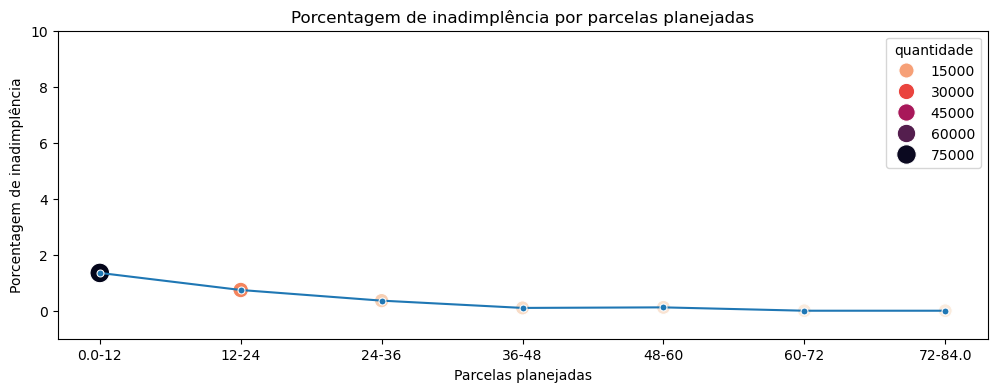

In [759]:
parcelas_plan_inad = (
    df_model.groupby(['over60mob06', 'qtd_parcelas_planejadas_bins'], observed=False) \
    .agg(count = pd.NamedAgg(column='qtd_parcelas_planejadas_bins', aggfunc='count')) \
    .reset_index() \
    .pivot(index = 'qtd_parcelas_planejadas_bins', columns='over60mob06', values= 'count')    
)
parcelas_plan_inad.reset_index(inplace=True)

# Criando a coluna de quantidade total de ofertas
parcelas_plan_inad['quantidade'] = parcelas_plan_inad[0] + parcelas_plan_inad[1]

parcelas_plan_inad['Inadimplência_%'] = round((parcelas_plan_inad[1] / (parcelas_plan_inad[0] + parcelas_plan_inad[1]) * 100),2)


# Gráfico
plt.figure(figsize=(12,4))

g = sns.lineplot(data =parcelas_plan_inad, x= 'qtd_parcelas_planejadas_bins', y = 'Inadimplência_%', marker ='o', markersize = 5)

g1 = sns.scatterplot(
    data=parcelas_plan_inad,
    x='qtd_parcelas_planejadas_bins',
    y='Inadimplência_%',
    size='quantidade', 
    sizes=(100, 200),  
    alpha=1,  
    legend=True,  
    hue = 'quantidade',
    palette='rocket_r'
)

# Textos
plt.title('Porcentagem de inadimplência por parcelas planejadas')
plt.xlabel('Parcelas planejadas')
plt.ylabel('Porcentagem de inadimplência')
plt.ylim(-1,10)
None

In [757]:
# Definição para valores de BINS pelos Quantils
print('Quantil:\n' 
      'Q1:', df_model['valor_credito'].quantile(0.25), '\n'
      'Q2:', df_model['valor_credito'].quantile(0.5), '\n'
      'Q3:', df_model['valor_credito'].quantile(0.75), '\n'
)

# Nova coluna com os bins
bins = [df_model['valor_credito'].min(), 47911, 99000, 214350, df_model['valor_credito'].max()]
labels = [f'{df_model['valor_credito'].min()}-47911', '47911-99000', '99000-214350', f'214350-{df_model['valor_credito'].max()}']

df_model['valor_credito_BINS'] = pd.cut(df_model['valor_credito'], bins=bins, labels=labels, right=True, include_lowest=True)

Quantil:
Q1: 47911.5 
Q2: 99000.0 
Q3: 214350.75 



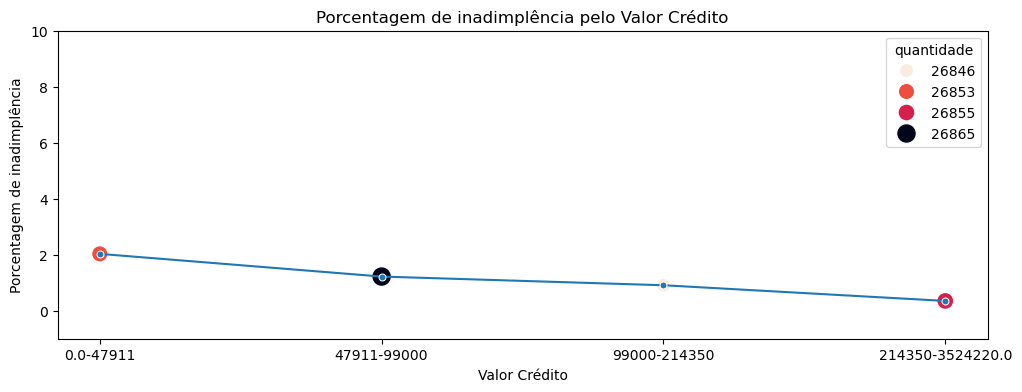

In [760]:
credito_inad = (
    df_model.groupby(['over60mob06', 'valor_credito_BINS'], observed=False) \
    .agg(count = pd.NamedAgg(column='valor_credito_BINS', aggfunc='count')) \
    .reset_index() \
    .pivot(index = 'valor_credito_BINS', columns='over60mob06', values= 'count')    
)
credito_inad.reset_index(inplace=True)

# Criando a coluna de quantidade total de ofertas
credito_inad['quantidade'] = credito_inad[0] + credito_inad[1]

credito_inad['Inadimplência_%'] = round((credito_inad[1] / (credito_inad[0] + credito_inad[1]) * 100),2)


# Gráfico
plt.figure(figsize=(12,4))

g = sns.lineplot(data =credito_inad, x= 'valor_credito_BINS', y = 'Inadimplência_%', marker ='o', markersize = 5)

g1 = sns.scatterplot(
    data=credito_inad,
    x='valor_credito_BINS',
    y='Inadimplência_%',
    size='quantidade', 
    sizes=(100, 200),  
    alpha=1,  
    legend=True,  
    hue = 'quantidade',
    palette='rocket_r'
)

# Textos
plt.title('Porcentagem de inadimplência pelo Valor Crédito')
plt.xlabel('Valor Crédito')
plt.ylabel('Porcentagem de inadimplência')
plt.ylim(-1,10)
None

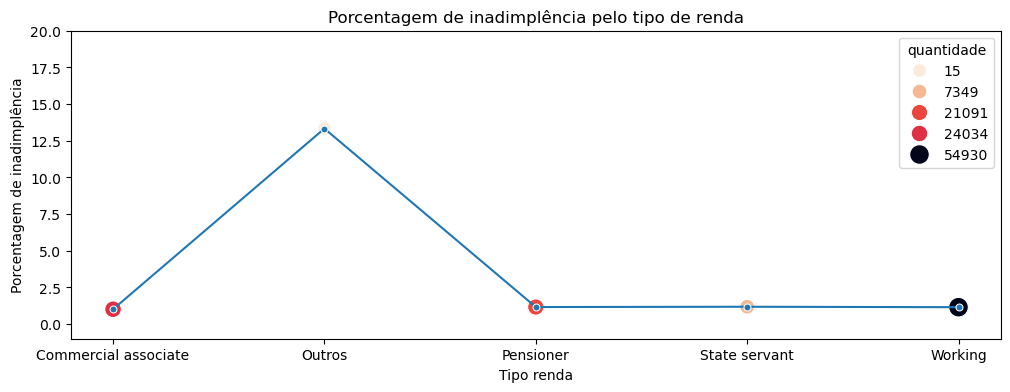

In [790]:
tipo_renda_inad = (
    df_model.groupby(['over60mob06', 'tipo_renda'], observed=False) \
    .agg(count = pd.NamedAgg(column='tipo_renda', aggfunc='count')) \
    .reset_index() \
    .pivot(index = 'tipo_renda', columns='over60mob06', values= 'count')    
)
tipo_renda_inad.reset_index(inplace=True)

# Criando a coluna de quantidade total de ofertas
tipo_renda_inad['quantidade'] = tipo_renda_inad[0] + tipo_renda_inad[1]

tipo_renda_inad['Inadimplência_%'] = round((tipo_renda_inad[1] / (tipo_renda_inad[0] + tipo_renda_inad[1]) * 100),2)


# Gráfico
plt.figure(figsize=(12,4))

g = sns.lineplot(data =tipo_renda_inad, x= 'tipo_renda', y = 'Inadimplência_%', marker ='o', markersize = 5)

g1 = sns.scatterplot(
    data=tipo_renda_inad,
    x='tipo_renda',
    y='Inadimplência_%',
    size='quantidade', 
    sizes=(100, 200),  
    alpha=1,  
    legend=True,  
    hue = 'quantidade',
    palette='rocket_r'
)

# Textos
plt.title('Porcentagem de inadimplência pelo tipo de renda')
plt.xlabel('Tipo renda')
plt.ylabel('Porcentagem de inadimplência')
plt.ylim(-1, 20)
None

## Modelagem